# 클래스공부 10단계
> 문자열 join, matplotlib, 참조와 에일리어싱

## 문자열 join

`-` 예제

In [2]:
'abcd'

'abcd'

In [6]:
lst = list('abcd')
lst

['a', 'b', 'c', 'd']

- `['a','b','c','d']`를 붙여서 `'abcd'`로 하고 싶은데?

In [5]:
''.join(lst)

'abcd'

In [9]:
a='' # string object

In [10]:
a?

Type:        str
String form: 
Length:      0
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.

In [11]:
a.join? # iterable이 와야함.

Signature: a.join(iterable, /)
Docstring:
Concatenate any number of strings.

The string whose method is called is inserted in between each given string.
The result is returned as a new string.

Example: '.'.join(['ab', 'pq', 'rs']) -> 'ab.pq.rs'
Type:      builtin_function_or_method

In [12]:
a.join(lst) # lst도 일단 리스트니까 iterable object

'abcd'

In [16]:
set(dir(lst)) & {'__iter__' , '__next__'} # iterable object임을 확인

{'__iter__'}

`-` 해설: `''`는 string object이고, `.join`는 string object에 소속된 메서드이다.

In [17]:
a = ''
a.join(lst) # join(a,lst) 와 같은 효과

'abcd'

`-` join의 간단한 사용방법

In [18]:
'-'.join(lst)

'a-b-c-d'

## matplotlib

`-` 파이썬의 모든것은 객체이다:matplotlib의 다른 사용 (객체지향적 언어로 그림그리기!)

`-` 그림오브젝트 생성

In [37]:
import matplotlib.pyplot as plt

In [38]:
fig = plt.figure() # plt라는 모듈안에서 figure()라는 함수 실행

<Figure size 432x288 with 0 Axes>

그림오브젝트가 실행되고 fig라는 이름이 붙음

In [39]:
id(fig)

140529470770096

In [41]:
fig

<Figure size 432x288 with 0 Axes>

`-` 그림오브젝트의 액시즈를 확인 -> 아무것도 없음

In [42]:
fig.axes

[]

`-` (0,0) 자리에 (가로=1, 세로=1) 크기의 액시즈를 넣어보자.

In [43]:
fig.add_axes([0,0,1,1])

<Axes: >

In [44]:
fig.axes

[<Axes: >]

- 아까는 빈 리스트였는데 뭔가 추가되어 있다.

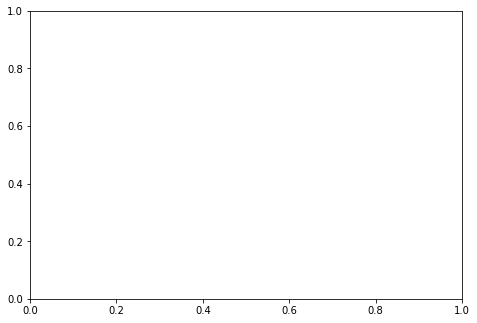

In [45]:
fig

`-` (0,1.2) 위치에 (가로=1,세로=1) 크기의 엑시즈 추가

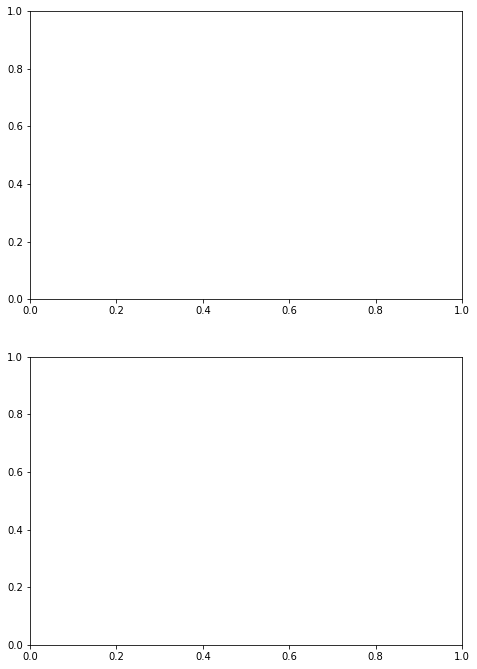

In [46]:
fig.add_axes([0,1.2, 1,1])
fig

`-` (0.5,0.5) 위치에 (가로=1, 세로=1) 크기의 그림 추가

In [47]:
fig.add_axes([0.5,0.5,1,1])

<Axes: >

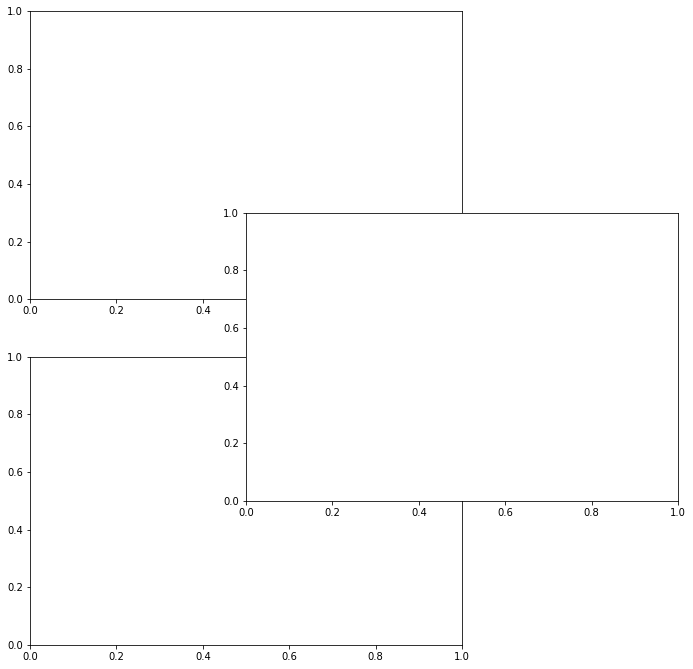

In [48]:
fig

`-` fig의 세번째 엑시즈에 접근

In [52]:
a3 = fig.axes[2] # 이것역시 오브젝트임.
a3

<Axes: >

In [51]:
id(fig.axes[2]) # 어딘가에 저장이 되어있으니까 오브젝트!

140529466106976

`-` 엑시즈의 메소드 중에 plot이 있음 $\to$ 이것으로 그림을 그려봄.

In [53]:
a3.plot([1,2,3],[4,5,3],'--r')

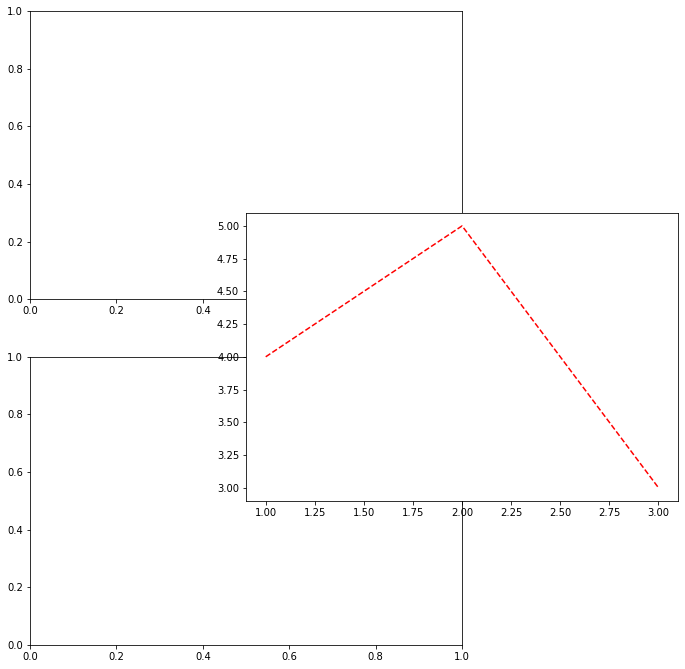

In [55]:
fig

`-` 다시 세번째 축에 접근하여 다른 그림을 그려보자.

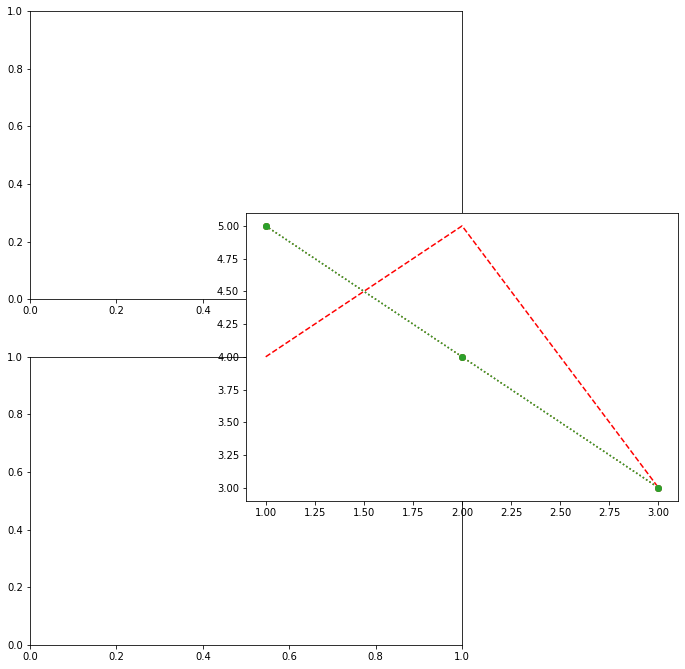

In [59]:
fig.axes[-1].plot([1,2,3],[5,4,3],':o')
fig

`-` 이제 첫번째 축에 접근하여 새로운 그림을 그려보자.

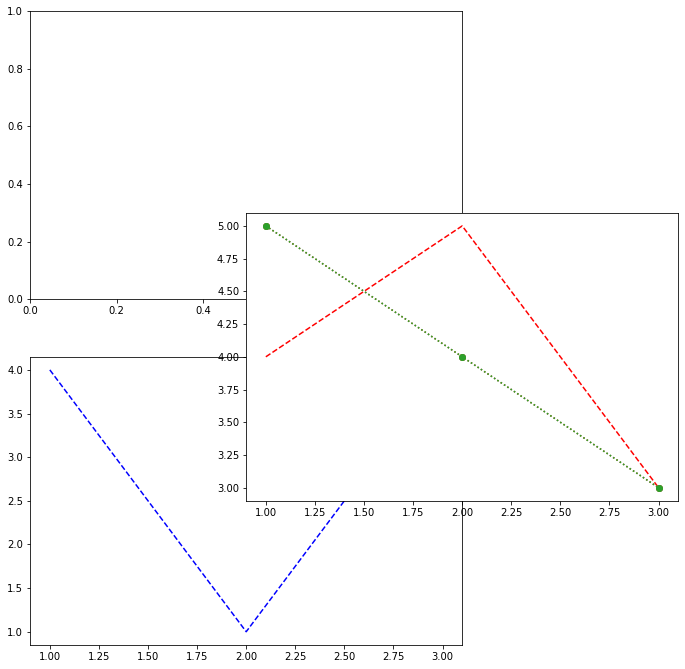

In [60]:
fig.axes[0].plot([1,2,3],[4,1,4],'--b')
fig

`-` 클래스에 대한 이해가 없다면 위와 같은 그림을 그리기도 힘들고 코드를 해석하기도 힘듬

## 참조와 에일리어싱

In [69]:
# !conda install -c conda-forge rise -y

`-` 아래의 코드를 관찰하자.

In [84]:
a = [1,2,3]
b = a

In [85]:
a, b

([1, 2, 3], [1, 2, 3])

In [86]:
id(a), id(b)

(140529440320192, 140529440320192)

같은 방문 앞에 a라는 포스트잇과, b라는 포스트잇이 같이 붙어있었음.

In [87]:
a = a + [4] ## 추가
a,b

([1, 2, 3, 4], [1, 2, 3])

In [88]:
id(a), id(b) # id 추적 -> a의 id 달라짐.

(140529450518400, 140529440320192)

새로운 공간(다른방)에 a라는 포스트잇을 붙인것 (방이 바뀐것)

`-` 이제 다시 아래의 코드를 관찰하자.

In [65]:
a = [1,2,3]
b = a
a.append(4)

현재 a,b의 출력결과는?

In [67]:
a, b

([1, 2, 3, 4], [1, 2, 3, 4])

`-` 아래의 코드를 다시 살펴보자.

In [72]:
a = [1,2,3]
b = a
a.append(4)

a,b라는 변수들은 메모리에 어떻게 저장이 되어있을까?

상상력을 조금 발휘하면 아래와 같이 여길 수 있다.

(1) 메모리는 변수를 담을 방이 여러개 있는 호텔이라고 생각하자.

(2) 아래를 실행하였을 경우

In [73]:
a = [1,2,3]

- 메모리주소1에 존재하는 방을 a라고 하고, 그 방에 [1,2,3]을 넣는다.

(3) 아래를 실행하였을 경우

In [74]:
b = a

- 메모리주소 38에 존재하는 방을 b라고 하고, 그 방에 a를 넣어야하는데 a는 [1,2,3]이니까 [1,2,3]을 넣는다.

(4) 아래를 실행하면

In [75]:
a.append(4)

- 방  a로 가서 [1,2,3]을 [1,2,3,4]로 바꾼다.
- 그리고 방 b에는 아무것도 하지 않는다.

`-` R에서는 맞는 비유인데, 파이썬은 적절하지 않은 비유이다.

In [77]:
id(a)

140529439072192

In [76]:
id(b)

140529439072192

실제로는 a,b가 저장된 메모리 주소가 동일함

`-` 파이썬에서는 아래가 더 적절한 비유이다.

(1) 메모리는 변수를 담을 방이 여러개 있는 호텔이라고 생각하자.

(2) 아래를 실행하였을 경우

In [78]:
a = [1,2,3]

- 메모리주소 140529439072192에서 [1,2,3]을 생성한다.
- 방 140529439072192의 방문에 a라는 포스트잇을 붙인다.
- 앞으로 [1,2,3]에 접근하기 위해서는 여러 메모리방중에서 a라는 포스트잇이 붙은 방을 찾아가면 된다.

(3) 아래를 실행하였을 경우

In [79]:
b=a

- a 라는 포스트잇이 있는데, a라는 포스트잇이랑 b라는 포스트잇과 같은 효과를 주도록 한다.
- 쉽게말하면, b라는 포스트잇을 방 140529439072192의 방문에 붙인다는 이야기.
- 앞으로 [1,2,3]에 접근하기 위해서는 여러 메모리방 중에서 a라는 포스트잇이 붙어있거나, b라는 포스트잇이 붙어있는 방을 찾아가면 된다.

(4) 아래를 실행하면

In [80]:
a.append(4)

- a라는 포스트잇이 붙어있는 방으로 가서, 그 내용물 append함수를 써서 4를 추가하라. 즉 내용물 [1,2,3]을 [1,2,3,4]로 바꾸라.
- 같은방에 a,b라는 포스트잇이 모두 붙어있음. 따라서 b라는 포스트잇이 붙은 방을 찾아가서 내용물을 열어보면 [1,2,3,4]가 나온다.

`-` 결론: 파이썬의 모든것은 오브젝트이다. 그리고 모든 오브젝트는 메모리주소 위에 올라간다. 하지만 그 메모리 주소에 붙어있는 포스트잇이 하나라는 보장은 없다.